# Уравнение Дини для процеса фокусировки загрязненного потока житкости

 <p>Добрый день, Олег Маркович. В этом документе попытаюсь смоделировать уравнение Улисса Дини для электромагнитного фокусирования загрязнений потока житкости. Я буду использовать Jupyter Notebook, специальную среду, где можно соединять форматированный текст и исполняемый код программы. Такая форма представления очень удобна для небольших программ, что используются в научных целях. Главное удобство в том, что здесь я могу вкратце для себя же описать уравнение и здесь же написать и исполнить код программы не переключаясь между документами. К тому же если я правильно разверну этот документ на сервере, то вы сможете лично проверить правильность построения модели и протестировать работу программы. Что также очень удобно.</p>
<p>Если вы не против, начну просто с канонической поверхности Дини и ее геометрического представления. Я здесь буду писать разные определения, которые могут показаться банальными и элементарными. Подобные вещи я буду писать просто для себя чтобы самому разбираться в процесе моделирования.</p>
<p>Согласно <a href="https://web.archive.org/web/20070411211617/http://public.kitware.com/VTK/pdf/VTKParametricSurfaces.pdf">[1]</a>, поверхность Дини - это поверхность с постоянной отрицательной Гауссовой кривизной, которая может быть создана путем скручивания "псевдосферы". В отличии от "псевдосферы", обычная сфера имеет положительную Гауссовую кривизну. Описывается поверхность Дини следующей системой уравнений<a href="http://mathworld.wolfram.com/DinisSurface.html">[2]</a>:</p>
$$
x=a\ cos\ u\ sin\ v
$$
$$
y = a\ sin\ u\ sin\ v \tag 1
$$
\begin{equation*}
z = a\ \{ cos\ v\ + ln\ [\ tan( \frac{1}{2} v\ ) ]\  \} + b\ u\ 
\end{equation*}

<p> В отличии от обычного параметрического уравнения конуса, в котором присутствуют три постоянных a, b и с: В уравнении Дини постоянных лишь две, так как <b> если поверхность конуса является конусом вращения, то параметры b и с - равны между собой</b> <a href="http://bookzooka.com/book/731-ploskie-i-prostranstvennye-krivye-poverxnosti-metodicheskie-razrabotki-vi-ikryannikov/11-31-poverxnosti-vtorogo-poryadka.html">[3]</a>.</p> <p> Попробую смоделировать даную систему уравнений в каноничном виде:</p>

In [8]:
# Здесь можно менять значения констант a и b, чтобы узнать как при этом изменится форма спирали
a = 1
b = 0.2

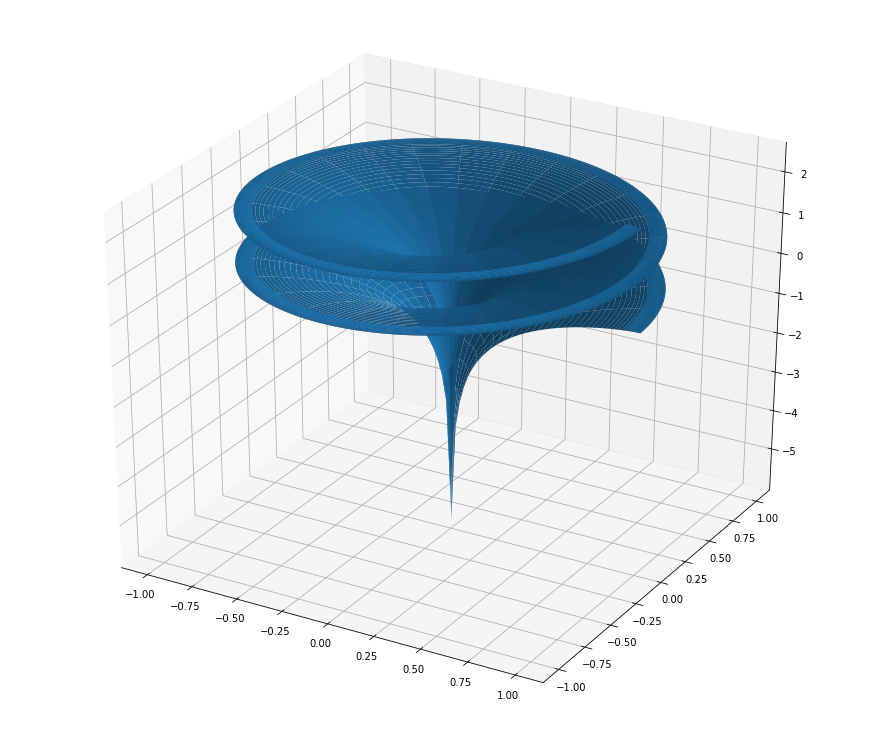

Рисунок 1. Канонический параболоид вращения, описанный Улиссом Дини с ручным изменением параметров a и b


In [9]:
# Построим саму модель
import pylab
from mpl_toolkits.mplot3d import Axes3D
from math import pi
import numpy

def makeData ():
    u = numpy.arange (0, 4*pi, 0.01) # Задаем размерность u как последовательность от 0.1 до 4 π с интервалом 0.01
    v = numpy.arange (0.002, 2, 0.02) # Задаем размерность v как последовательность от 0.1 до 2 с интервалом 0.02
    ugrid, vgrid = numpy.meshgrid(u, v) # Преобразуем числа в систему координат
    xgrid = a * numpy.cos(ugrid) * numpy.sin(vgrid) # Расчитываем по формуле Х
    ygrid = a * numpy.sin(ugrid) * numpy.sin(vgrid) # Расчитываем по формуле Y
    zgrid =  a * (numpy.cos(vgrid) + numpy.log(numpy.tan(vgrid/2)) + b * ugrid) # Расчитываем по формуле Z 
    return xgrid, ygrid, zgrid

x, y, z = makeData() # Генерируем данные 

fig = pylab.figure(figsize = (12,10))
axes = Axes3D(fig) # Создаем трехмерную плоскость  и настраиваем размер рисунка

axes.plot_surface(x, y, z)

pylab.show() # отображаем
print("Рисунок 1. Канонический параболоид вращения, описанный Улиссом Дини с ручным изменением параметров a и b")

Если изобразить трехмерную модель Дини в двухмерных пространствах (x,y), (x,z), (y,z), можно заметить, что параметры u и v - азимут и широта сферической системы координат относительно оси Z. Константы a и b - это радиус и интенсивность вращения псевдосферы.

In [11]:
from matplotlib import pyplot as plt

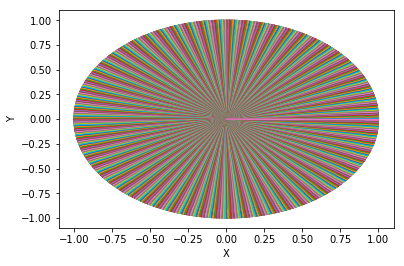

In [12]:
plt.plot(x,y)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

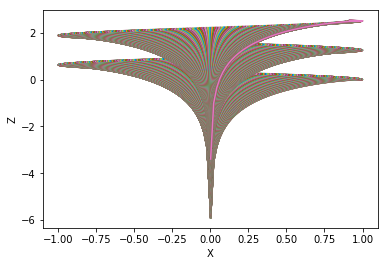

In [13]:
plt.plot(x,z)
plt.ylabel('Z')
plt.xlabel('X')
plt.show()

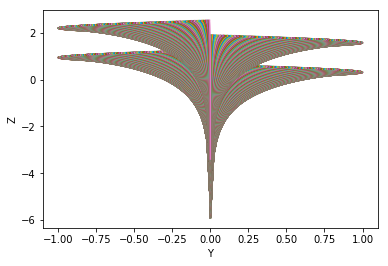

In [14]:
plt.plot(y,z)
plt.ylabel('Z')
plt.xlabel('Y')
plt.show()

<p>Смоделируем процес фокусировки примесей в потоке воды под действием электромагнитоного поля. Согласно <a href="http://journals.uran.ua/eejet/article/viewFile/75251/72216">[4]</a>,  взаимодействие постоянного аксиально-симметричного электромагнитного поля с примесями обеспечивает Ларморову прецессию в потоке житкости. Это влияет на траекторию движения заряженных частиц вокруг вектора внешнего магнитного поля. Совокупность сил Лоренца и Лармора обеспечивают спиральную траекторию движения примесей, а общая масса примесей фокусируется в параболоид вращения(рисунок 2). Именно по-этому площадь, описанная Дини - наиболее подходящая математическая модель для описания процесса фокусирования ионов, которые делают воду непригодной для потребления. Попробуем выразить уравнение Дини с учетом силы Лоренца и влиянием Ларморовой прецессии. </p><img src="2.png" > <center>Рисунок 2. Траектория движения загрязняющих примесей под действием совокупности сил Лоренца и Лармора</center>
<p> <b>Лармора прецессия </b> - дополнительное вращение как целого («прецессия») устойчивой системы одинаковых заряженных частиц, возникающее при наложении на систему однородного постоянного магнитного поля, направление которого и служит осью вращения.  Ларморова прецессия обусловлена действием на заряженные частицы магнитной части силы Лоренца и аналогична прецессии оси волчка (гироскопа) под действием силы, стремящейся изменить направление оси его вращения. Под действием возникшего орбитального момента вектор направления движения получает приращение. Оно совпадает с вектором момента силы, действующей на ион примеси. В результате этого плоскость, в которой лежат вектора орбитального магнитного момента и индукции внешнего магнитного поля, повернется на некоторый угол.</p>
<p> Угловая частота прецессии для примеси с определенными значениями заряда и массы иона расчитывается по формуле (2): \begin{equation*}
\omega_L=  \frac{|e| \cdot B}{2 \cdot m}   \tag 2
\end{equation*}
<center>где е - заряд частицы, Кл; В - магнитная индукция, Тл; m - масса заряженной частицы, кг</center></p>
<p> Радиус Лармора - радиус акружности, по которой движется заряженная частица в плоскости, перпендикулярном магнитному полю. Движение заряда в однородном магнитном поле происходит под действием <a href="https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BB%D0%B0_%D0%9B%D0%BE%D1%80%D0%B5%D0%BD%D1%86%D0%B0">силы Лоренца</a>. В релятивистской системе координат Ларморов радиус можно определить по формуле (3)<a href ="http://electe.blogspot.com/2011/07/blog-post_27.html">[5]</a>:  </p>
\begin{equation*}
R=  \frac{2 \cdot v \cdot m}{|e| \cdot B}   \tag 3
\end{equation*}
<center>где v = 1,5 - скорость движения жидкости в трубопроводе, м/c</center>
<p> Магнитная индукция расчитывается по формуле (4):</p>
\begin{equation*}
B=  \frac{\mu_0 \cdot I \cdot N}{L_k}   \tag 4
\end{equation*}
<center>где $ \mu_0  $ = 1,257 E-6 - магнитная постоянна, Гн/м; I - сила тока в обмотке, А; N - количество витков обмотки, шт; $ L_k $ - длинна котушки, м. </center>

<p> Так как параметры u,v в системе уравнений Дини являются угловыми коэфициэнтами разметки плоскостей, за размерность плоскости отвечают константы a и b. Константа а является параметром, что характеризует радиус вращения плоскости Дини. Если описывать с помощью данной математической модели процес фокусировки вредных частичек в потоке воды, логичным будет использовать вместо коэфициента а Ларморов радиус. Аналогично вместо b, которая характеризует степень вращения плоскости, можно использовать угловую частоту прецесии, описанную в (2). Если подставить (2) и (3) в (1), получим новую систему уравнений, описывающую движение загрязненных примисей под действием силы Лоренца. Результат представлен в формуле (5): </p>
$$
x=R cos\ u\ sin\ v
$$
$$
y = R sin\ u\ sin\ v \tag 5
$$
\begin{equation*}
z = R \{ cos\ v\ + ln\ [\ tan( \frac{1}{2} v\ ) ]\  \} + \omega_L u\ 
\end{equation*}
<p> Построим зависимость площади Дини для фокусировки примесей от силы тока I и количества витков обмотки катушки индуктивности. Проведем моделирование при таких условиях<a href="http://journals.uran.ua/eejet/article/viewFile/75251/72216">[4]</a>: </p>
$ \bullet $Масса заряженной частицы загрязнения m = $ 5,89 \cdot 10^-26 $ кг <br>
$ \bullet $Длинная котушки фокусирования частиц $ L_k $  = 0,5 м <br>
$ \bullet $Элементарный заряд частицы $ е = 1,6 \cdot 10^-19$ Кл <br>
Тогда формулы (2) и (3) приобритают вид:
\begin{equation*}
\omega_L=  341,46 \cdot I \cdot N 
\end{equation*}
\begin{equation*}
R=  \frac{4,393 \cdot 10^-3}{I \cdot N }  
\end{equation*}
А сама модель Дини приобретает форму системы уравнений:
$$
x=\frac{4,393 \cdot 10^-3  cos\ u\ sin\ v }{I \cdot N } 
$$
//
$$
y = \frac{4,393 \cdot 10^-3 sin\ u\ sin\ v  }{I \cdot N }  
$$
//
\begin{equation*}
z = \frac{4,393 \cdot 10^-3 \{ cos\ v\ + ln\ [\ tan( \frac{1}{2} v\ ) ]\  \}  }{I \cdot N } + 341,46 \cdot I \cdot N \cdot u\ 
\end{equation*}
Смоделируем процес фокусировки загрязненного потока житкости используя параметрическую систему уравнений Дини

In [11]:
(1.6e-19)*(1.257e-6)*1.5/((0.5)*2*(5.89e-26))

5.1219015280135824

In [12]:
2*1.5*(5.89e-26)/((1.6e-19)*(1.257e-6))

0.8785799522673031

In [6]:
# Вводим параметры катушки индуктивности I и N:
I = 0.03#ток, А
N = 100 # количество витков катушки, шт

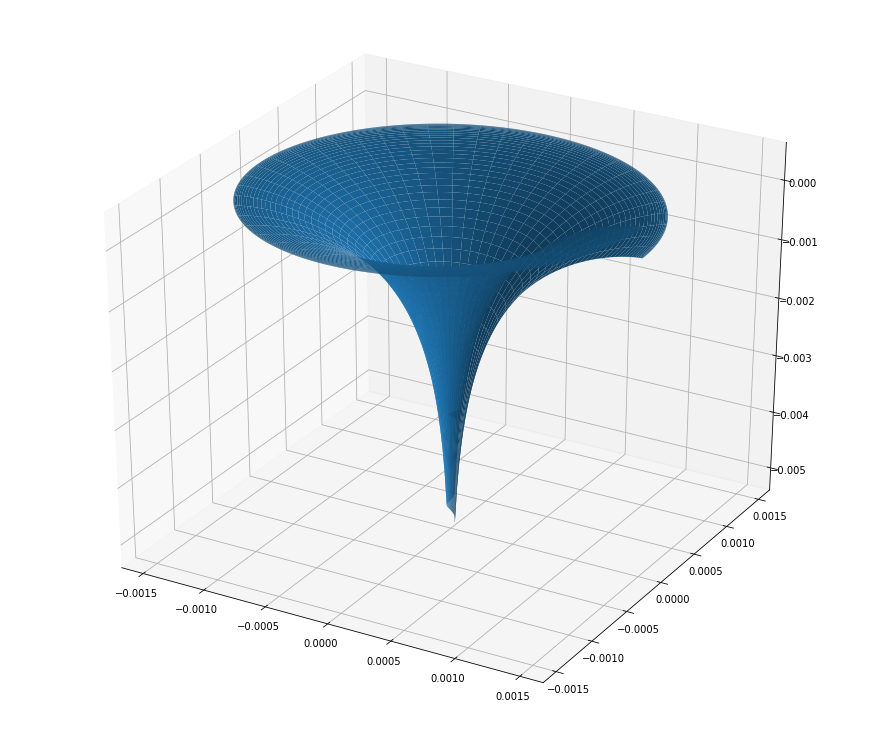

Рисунок 1. Канонический параболоид вращения, описанный Улиссом Дини с ручным изменением параметров I и N


In [7]:
# Построим саму модель
import pylab
from mpl_toolkits.mplot3d import Axes3D
from math import pi
import numpy


a = 4.393 * 10 ** (-3) / (I * N)
b = 2*pi / 341.46 * I * N



def makeData ():
    u = numpy.arange (0, 2*pi, 0.01) # Задаем размерность u как последовательность от 0.1 до 4 π с интервалом 0.01
    v = numpy.arange (0.02, pi/2, 0.01) # Задаем размерность v как последовательность от 0.1 до 2 π с интервалом 0.02
    ugrid, vgrid = numpy.meshgrid(u, v) # Преобразуем числа в систему координат
    xgrid = a * numpy.cos(ugrid) * numpy.sin(vgrid) # Расчитываем по формуле Х
    ygrid = a * numpy.sin(ugrid) * numpy.sin(vgrid) # Расчитываем по формуле Y
    zgrid =  a * (numpy.cos(vgrid) + numpy.log(numpy.tan(vgrid/2)) + b * ugrid) # Расчитываем по формуле Z 
    return xgrid, ygrid, zgrid

x, y, z = makeData() # Генерируем данные 

fig = pylab.figure(figsize = (12,10))
axes = Axes3D(fig) # Создаем трехмерную плоскость  и настраиваем размер рисунка

axes.plot_surface(x, y, z)

pylab.show() # отображаем
print("Рисунок 1. Канонический параболоид вращения, описанный Улиссом Дини с ручным изменением параметров I и N")

In [1]:
# НА ЭТОТ КОД НЕ ОБРАЩАЙТЕ ВНИМАНИЯ, ЭТО ВСЕГО ЛИШЬ РАЗМЕТКА ДОКУМЕНТА. ПОСТАВИЛ ДЛЯ УДОБСТВА ПРИВЫЧНЫЙ TIMES NEW ROMAN,
# НАСТРОИЛ ОТСТУПЫ И Т.Д.
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 1.6em;
line-height:1.2em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.4em;
line-height:1.2em;
padding-left:2em;
padding-right:2em;
text-align:justify;
text-indent:1.5em;
}
</style>
""")